# Bond with Embedded Calls and Put Options

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from financepy.utils import *
from financepy.products.bonds import *
from financepy.market.curves.discount_curve import DiscountCurve
from financepy.products.rates import *
from financepy.models.hw_tree import HWTree
from financepy.models.bk_tree import BKTree

####################################################################
# FINANCEPY BETA Version 0.200 - This build:  14 Jul 2021 at 13:18 #
# **** NEW PEP8 COMPLIANT VERSION -- PLEASE UPDATE YOUR CODE  **** #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [3]:
valuation_date = Date(1, 1, 2007)
settlement_date = valuation_date

### Set up discount curve

In [4]:
dcType = DayCountTypes.ACT_360
fixedFreq = FrequencyTypes.SEMI_ANNUAL
swapType = SwapTypes.PAY
swap1 = IborSwap(settlement_date, Date(1,1,2008), swapType, 0.05, fixedFreq, dcType)
swap2 = IborSwap(settlement_date, Date(1,1,2009), swapType, 0.05, fixedFreq, dcType)
swap3 = IborSwap(settlement_date, Date(1,1,2010), swapType, 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discount_curve = IborSingleCurve(valuation_date, [], [], swaps)

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [5]:
issue_date = Date(1,1, 2000)
maturity_date = Date(1, 1, 2010)
coupon = 0.05
frequencyType = FrequencyTypes.ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA

In [6]:
bond = Bond(issue_date, maturity_date, coupon, frequencyType, accrual_type)

In [7]:
v = bond.clean_price_from_discount_curve(settlement_date, discount_curve)

In [8]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62397520199494


Now specify the put and call dates

In [9]:
call_dates = []
call_prices = []
put_dates = [Date(1, 1, 2008), Date(1, 1, 2009), Date(1, 1, 2010)]
put_prices = [100.0, 100.0, 100.0]

Now create the BondEmbeddedOption

In [10]:
puttableBond = BondEmbeddedOption(issue_date, maturity_date, coupon, frequencyType, accrual_type,
                                     call_dates, call_prices, put_dates, put_prices)

### The Hull-White Model

In [11]:
sigma = 0.01  # basis point volatility
a = 0.1
num_time_steps = 200

In [12]:
model = HWTree(sigma, a, num_time_steps)

In [13]:
v = puttableBond.value(settlement_date, discount_curve, model)

In [14]:
print(v)

{'bondwithoption': 100.47862897596961, 'bondpure': 99.62397520199491}


### Convergence Testing

In [15]:
timeSteps = range(20,220,1)
values = []
for num_time_steps in timeSteps:
    model = HWTree(sigma, a, num_time_steps)
    v = puttableBond.value(settlement_date, discount_curve, model)
    values.append(v['bondwithoption'])

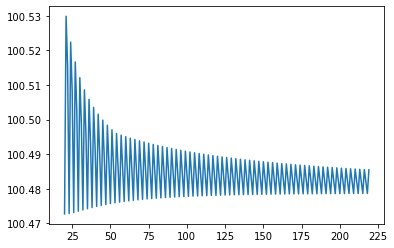

In [16]:
plt.plot(timeSteps, values);

Copyright (c) 2020 Dominic O'Kane